# Object Localization
Let's see if we can extract only the product out of the image.

In [1]:
import os
import cv2
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [93]:
# Load one image
folder = os.listdir('../../data')[0]
path = glob('../../data/' + folder + '/*.jpg')[4]
path = '../../data/test_images/test_image_2.jpeg'
img = cv2.imread(path)
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_OTSU)
# thresh = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
blur = cv2.GaussianBlur(thresh, (7, 7), 0)

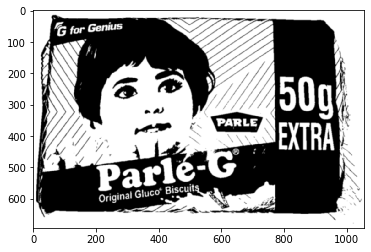

In [96]:
plt.imshow(blur, cmap='gray')

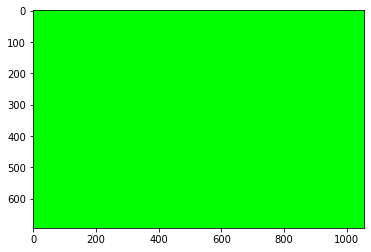

In [83]:
cnt, hier = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
rect_cnts = []
        
max_area_cnt = sorted(cnt, key=cv2.contourArea)[-1]
cv2.drawContours(img_copy, [max_area_cnt], -1, (0, 255, 0), -1)
plt.imshow(img_copy)

In [25]:
locs = []
for x in range(img_copy.shape[0]):
    for y in range(img_copy.shape[1]):
        if img_copy[x, y, :].tolist() == [0, 255, 0]:
            locs.append([x, y])

In [72]:
mask = np.zeros((img.shape[0], img.shape[1]))
for loc in locs:
    mask[loc[0], loc[1]] = 255

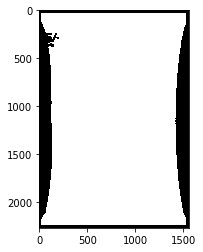

In [73]:
plt.imshow(mask, cmap='gray')